<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/data/data_2d.csv'
path2 = '/content/drive/MyDrive/Colab Notebooks/data/mnist.csv'

Before training the model using K-means clustering, it is recommended to find appropriate value of K. The function below can be used to find the K value. Create an instance of the K-Means model for each number of clusters ranging from 1 to 10, and fit it to the dataset. The inertia_ attribute of the KMeans object returns the sum of squared distances of samples to their closest cluster center.

In [4]:
def elbow_method(X, name_df):
  inertia = []
  for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init='auto').fit(X)
    inertia.append(km.inertia_)

  plt.plot(range(1,11), inertia, 'bx-')
  plt.xlabel('Values of clusters')
  plt.ylabel('Inertia')
  plt.title(f'Elbow Method for {name_df}')
  plt.show()

  return(inertia)


In [22]:
df_2d = pd.read_csv(path)
df_mnist = pd.read_csv(path2)

In [17]:
df_mnist.sample(5)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
86,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_2d.sample(5)

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
167,1.0,1.663957,1.887888
154,1.0,3.306123,5.420099
74,0.0,2.912498,1.623106
40,0.0,1.653235,0.428643
185,1.0,3.055140,4.029546


In [9]:
df_2d.shape

(199, 3)

Використаємо алгоримтом PCA щоб зменшити розмірність  даних до 2-вимірного варіанту.

In [6]:
df_mnist_pca =  pd.DataFrame(PCA(n_components=2).fit_transform(df_mnist))
df_mnist_pca.sample(5)

,0,1
191,238.858429,-473.482658
105,542.629211,-611.611607
232,213.283613,645.872652
446,-115.244046,289.346538
154,171.754255,87.886195


Normalizing the Data

In [7]:
scaler = preprocessing.StandardScaler()
df_2d_norm = pd.DataFrame(scaler.fit_transform(df_2d))
df_mnist_pca_norm = pd.DataFrame(scaler.fit_transform(df_mnist_pca))

In [8]:
df_2d_norm.sample(5), df_mnist_pca_norm.sample(5)

(            0         1         2
 85  -1.005038 -0.609444  0.541368
 127  0.994987 -1.243101 -0.406161
 140  0.994987 -0.370225 -0.257617
 158  0.994987 -0.275084  0.512795
 16  -1.005038 -0.185683 -0.293729,
             0         1
 276  0.488587  0.451249
 169  0.059856  1.451846
 378  0.983229  1.522794
 487 -0.634598  1.298524
 490  0.295534 -0.155936)

# data_2d

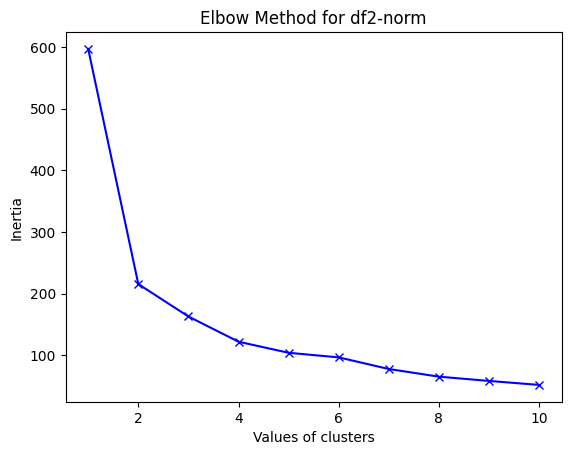

[597.0,
 215.6271310863853,
 163.07827742315186,
 122.17157480900619,
 104.19989031806095,
 96.75222465150343,
 77.90103180697335,
 65.47701243325034,
 58.56311746274184,
 52.097813672117574]

In [10]:
elbow_method(df_2d_norm, 'df2-norm')

Conclusion: Quantity of clusters for data_2d = 2

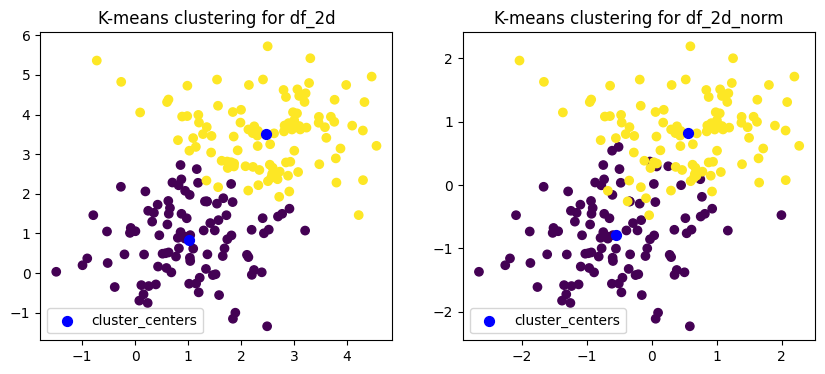

In [55]:
X = [df_2d, df_2d_norm]
plt.figure(figsize=(10,4))

for i in range(2):
  km_d2 = KMeans(n_clusters=2, n_init='auto').fit(X[i])
  clusters = km_d2.predict(X[i])
  plt.subplot(1, 2, i + 1)
  plt.scatter(X[i].iloc[:,1], X[i].iloc[:,2], c=clusters)
  plt.scatter(km_d2.cluster_centers_[:, 1], km_d2.cluster_centers_[:, 2], marker='.', c='blue', s=200, label='cluster_centers' )
  plt.legend()
  title = 'df_2d_norm' if i == 1 else 'df_2d'
  plt.title(f'K-means clustering for {title}')

plt.show()

In [51]:
km_d2.cluster_centers_,

(array([[-0.96543335, -0.54280685, -0.79550084],
        [ 0.99498744,  0.55942339,  0.8198529 ]]),)

# df_mnist

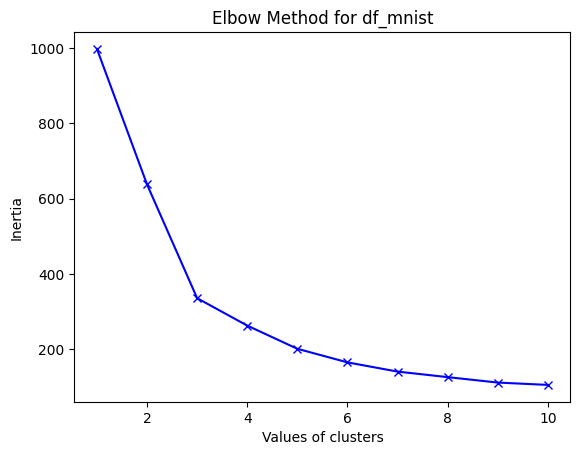

[998.0000000000007,
 637.5226003799601,
 335.1559831179605,
 262.36709735498914,
 200.64432831344686,
 164.55287020508973,
 139.9984889892274,
 125.3343398393337,
 110.85513160462838,
 104.59565804257369]

In [56]:
elbow_method(df_mnist_pca_norm, 'df_mnist')

Conclusion: quantity of clusters for df_mnist= 3

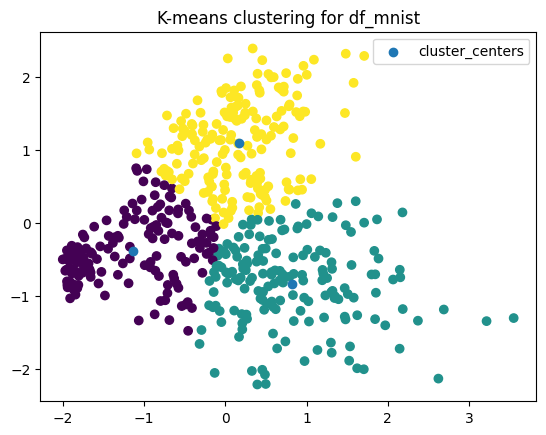

In [57]:
km_df_mnist = KMeans(n_clusters=3, n_init='auto').fit(df_mnist_pca_norm)
clusters_mnist = km_df_mnist.predict(df_mnist_pca_norm)

plt.scatter(df_mnist_pca_norm[0], df_mnist_pca_norm[1], c=clusters_mnist)
plt.scatter(km_df_mnist.cluster_centers_[:, 0],km_df_mnist.cluster_centers_[:, 1], label='cluster_centers')
plt.legend()
plt.title(f'K-means clustering for df_mnist')

plt.show()

In [53]:
km_df_mnist.cluster_centers_

array([[-1.12806905, -0.37814872],
       [ 0.81498549, -0.83725538],
       [ 0.16767813,  1.09304043]])